# 데이터 불러오기

In [1]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

C:\Users\ilifo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ilifo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ilifo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ilifo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

In [3]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [4]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [5]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [6]:
train_df.head()

review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1

In [17]:
reviews = list(train_df['review'])
reviews

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

# 데이터 분석

In [22]:
reviews[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [18]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]
tokenized_reviews

[['Bromwell',
  'High',
  'is',
  'a',
  'cartoon',
  'comedy.',
  'It',
  'ran',
  'at',
  'the',
  'same',
  'time',
  'as',
  'some',
  'other',
  'programs',
  'about',
  'school',
  'life,',
  'such',
  'as',
  '"Teachers".',
  'My',
  '35',
  'years',
  'in',
  'the',
  'teaching',
  'profession',
  'lead',
  'me',
  'to',
  'believe',
  'that',
  'Bromwell',
  "High's",
  'satire',
  'is',
  'much',
  'closer',
  'to',
  'reality',
  'than',
  'is',
  '"Teachers".',
  'The',
  'scramble',
  'to',
  'survive',
  'financially,',
  'the',
  'insightful',
  'students',
  'who',
  'can',
  'see',
  'right',
  'through',
  'their',
  'pathetic',
  "teachers'",
  'pomp,',
  'the',
  'pettiness',
  'of',
  'the',
  'whole',
  'situation,',
  'all',
  'remind',
  'me',
  'of',
  'the',
  'schools',
  'I',
  'knew',
  'and',
  'their',
  'students.',
  'When',
  'I',
  'saw',
  'the',
  'episode',
  'in',
  'which',
  'a',
  'student',
  'repeatedly',
  'tried',
  'to',
  'burn',
  'down'

In [21]:
tokenized_reviews[0]

['Bromwell',
 'High',
 'is',
 'a',
 'cartoon',
 'comedy.',
 'It',
 'ran',
 'at',
 'the',
 'same',
 'time',
 'as',
 'some',
 'other',
 'programs',
 'about',
 'school',
 'life,',
 'such',
 'as',
 '"Teachers".',
 'My',
 '35',
 'years',
 'in',
 'the',
 'teaching',
 'profession',
 'lead',
 'me',
 'to',
 'believe',
 'that',
 'Bromwell',
 "High's",
 'satire',
 'is',
 'much',
 'closer',
 'to',
 'reality',
 'than',
 'is',
 '"Teachers".',
 'The',
 'scramble',
 'to',
 'survive',
 'financially,',
 'the',
 'insightful',
 'students',
 'who',
 'can',
 'see',
 'right',
 'through',
 'their',
 'pathetic',
 "teachers'",
 'pomp,',
 'the',
 'pettiness',
 'of',
 'the',
 'whole',
 'situation,',
 'all',
 'remind',
 'me',
 'of',
 'the',
 'schools',
 'I',
 'knew',
 'and',
 'their',
 'students.',
 'When',
 'I',
 'saw',
 'the',
 'episode',
 'in',
 'which',
 'a',
 'student',
 'repeatedly',
 'tried',
 'to',
 'burn',
 'down',
 'the',
 'school,',
 'I',
 'immediately',
 'recalled',
 '.........',
 'at',
 '..........',


In [24]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token[2]

147

In [20]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
review_len_by_eumjeol[0]

667

Text(0, 0.5, 'Number of Reviews')

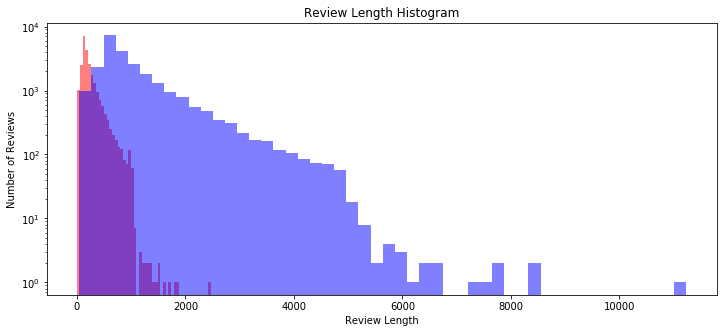

In [11]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [12]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18237d21748>,
 'caps': [<matplotlib.lines.Line2D at 0x18237d1ba08>,
 'boxes': [<matplotlib.lines.Line2D at 0x18237dacf08>],
 'medians': [<matplotlib.lines.Line2D at 0x18237cfaf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x18237d528c8>],
 'means': [<matplotlib.lines.Line2D at 0x18237abc908>]}

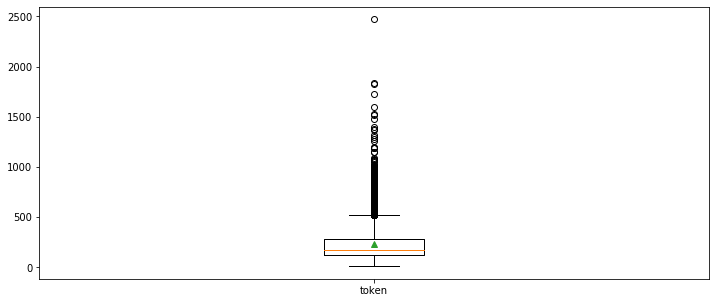

In [13]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x18237fab8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x18237fabf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x18237dee308>],
 'medians': [<matplotlib.lines.Line2D at 0x18237fb0ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18237fb69c8>],
 'means': [<matplotlib.lines.Line2D at 0x18237fb0fc8>]}

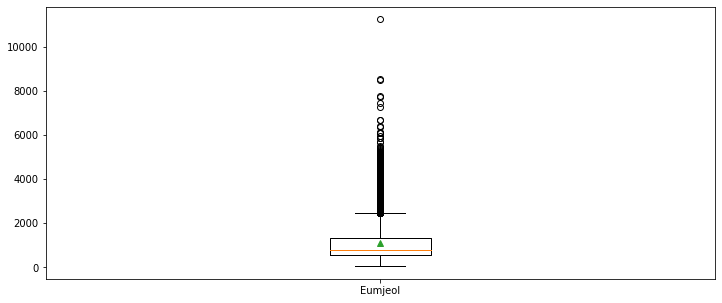

In [14]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

# 워드 클라우드

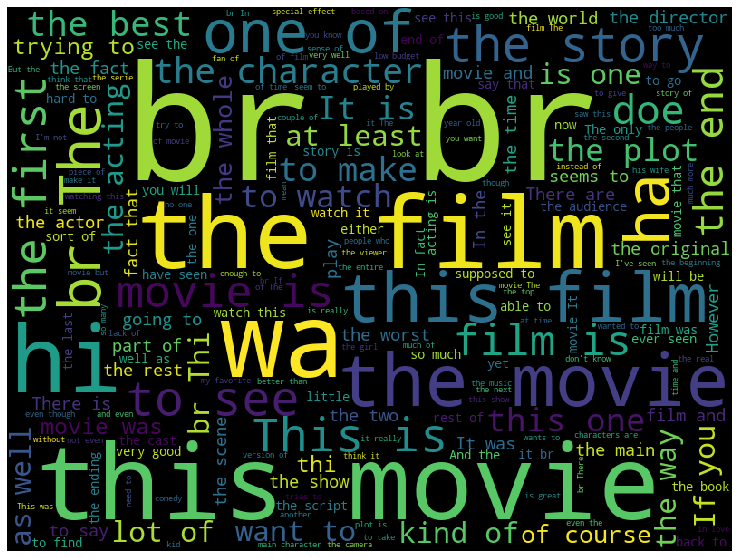

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 긍정 부정 분포

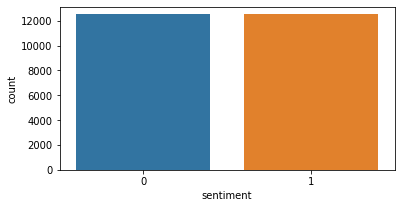

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])